<a href="https://colab.research.google.com/github/andartya-setyawan/TubesAnalisaKeputusanTI/blob/main/Analisis_Pasar_Mobil_Australia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tugas Besar: Analisis Pasar Mobil Australia

Nama: Andartya Setyawan Darna<br>
NIM: 202022420016
---
Proyek ini berfokus pada analisis data pasar mobil di Australia (Australia Car Market Data). Dataset ini berisi ribuan entri mengenai berbagai jenis kendaraan yang dijual, mencakup berbagai merek, model, dan spesifikasi teknis lainnya. Tujuan utama dari analisis ini adalah memanfaatkan teknik Machine Learning untuk memprediksi kategori harga mobil (apakah termasuk kategori High-End/Mahal atau Budget/Terjangkau) berdasarkan karakteristik kendaraan tersebut.

Dengan memanfaatkan dataset yang mencakup berbagai informasi penting seperti merek, tahun pembuatan, tipe transmisi, tipe bodi, jarak tempuh, dan spesifikasi mesin, kami bertujuan untuk mengidentifikasi pola dan wawasan yang dapat memberikan pemahaman mendalam mengenai valuasi kendaraan. Melalui data preprocessing yang komprehensif, analisis data eksploratif (Exploratory Data Analysis/EDA), dan penerapan model klasifikasi Random Forest, proyek ini berupaya tidak hanya untuk memprediksi kategori harga dengan akurasi tinggi, tetapi juga mengungkap faktor-faktor mendasar yang paling berpengaruh terhadap penentuan harga mobil di pasaran.

Dengan memanfaatkan kemampuan bahasa pemrograman Python, library pandas untuk manipulasi data, matplotlib dan seaborn untuk visualisasi, serta Scikit-Learn sebagai backend untuk pemodelan, kita akan menavigasi proses analisis data secara menyeluruh. Perjalanan ini akan membawa kita dari pemuatan data awal (data loading) dan pembersihan data (data cleaning) menuju pembangunan dan evaluasi model, dengan tujuan akhir memberikan wawasan prediktif yang berharga dalam domain pasar otomotif.

In [1]:
# ==========================================
# 2. DATA LOADING & INITIAL EXPLORATION
# ==========================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Membaca Data
filename = 'https://raw.githubusercontent.com/andartya-setyawan/TubesAnalisaKeputusanTI/refs/heads/main/australia_car_market.csv'

try:
    df = pd.read_csv(filename)
    print("Data berhasil dimuat!")
except FileNotFoundError:
    print("File tidak ditemukan. Mohon upload file dataset terlebih dahulu.")

# Menampilkan 5 baris pertama data mentah
print("\n--- Tampilan Data Mentah (5 Teratas) ---")
display(df.head())

# Cek tipe data awal
print("\n--- Info Data Sebelum Cleaning ---")
print(df.info())

# ==========================================
# DATA CLEANING (PEMBERSIHAN DATA)
# ==========================================
# Masalah pada dataset ini:
# Kolom 'Price' dan 'Kilometers' masih dianggap teks (Object) karena ada simbol ($, koma, km).
# Kita harus mengubahnya menjadi angka (Float/Integer).

print("\n... Sedang melakukan pembersihan data ...")

# 1. Hapus baris yang nilai Price atau Kilometers-nya kosong (NaN)
df = df.dropna(subset=['Price', 'Kilometers'])

# 2. Bersihkan Kolom Price
# Hapus semua karakter yang bukan angka atau titik
df['Price'] = df['Price'].astype(str).str.replace(r'[^0-9.]', '', regex=True)
# Ubah menjadi tipe data angka (float)
df['Price'] = pd.to_numeric(df['Price'], errors='coerce')

# 3. Bersihkan kolom Kilometers
# Hapus karakter 'km', koma, dll
df['Kilometers'] = df['Kilometers'].astype(str).str.replace(r'[^0-9.]', '', regex=True)
df['Kilometers'] = pd.to_numeric(df['Kilometers'], errors='coerce')

# 4. Hapus data yang gagal diubah (menjadi NaN)
df = df.dropna(subset=['Price', 'Kilometers'])

# Tampilkan hasil setelah dibersihkan
print("Data berhasil dibersihkan!")
print(f"Ukuran data sekarang: {df.shape[0]} baris, {df.shape[1]} kolom")

print("\n--- Info Data Setelah Cleaning ---")
print(df.info())

Data berhasil dimuat!

--- Tampilan Data Mentah (5 Teratas) ---


,ID,Name,Price,Brand,Model,Variant,Series,Year,Kilometers,Type,Gearbox,Fuel,Status,CC,Color,Seating Capacity
0,11530130,2010 Toyota Rukus Build 2 AZE151R,9999,Toyota,Rukus,Build 2,AZE151R,2010,263000,Wagon,Automatic,Unleaded Petrol,Used,2362,Grey,5
1,12190570,2021 Mercedes-Benz V 250 D Avantgarde MWB 447 ...,117990,Mercedes-Benz,V,250 D Avantgarde MWB,447 MY21,2021,19,Wagon,Automatic,Diesel,New In Stock,2143,Black,7
2,12321855,2021 Mercedes-Benz Valente 116 CDI MWB RWD 447...,79990,Mercedes-Benz,Valente,116 CDI MWB RWD,447 MY21,2021,24,Wagon,Automatic,Diesel,New In Stock,2143,Black,8
3,12346971,2010 Mercedes-Benz E250 CDI Avantgarde 207,34990,Mercedes-Benz,E250,CDI Avantgarde,207,2010,120579,Cabriolet,Automatic,Diesel,Used,2143,Black,4
4,12363884,2016 Holden Cruze CD JH MY16,15990,Holden,Cruze,CD,JH MY16,2016,72506,Sportswagon,Automatic,Unleaded Petrol,Used,1796,White,5



--- Info Data Sebelum Cleaning ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17048 entries, 0 to 17047
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   ID                17048 non-null  int64 
 1   Name              17048 non-null  object
 2   Price             17048 non-null  int64 
 3   Brand             17048 non-null  object
 4   Model             17048 non-null  object
 5   Variant           17048 non-null  object
 6   Series            17048 non-null  object
 7   Year              17048 non-null  int64 
 8   Kilometers        17048 non-null  int64 
 9   Type              17048 non-null  object
 10  Gearbox           17048 non-null  object
 11  Fuel              17048 non-null  object
 12  Status            17048 non-null  object
 13  CC                17048 non-null  int64 
 14  Color             17048 non-null  object
 15  Seating Capacity  17048 non-null  int64 
dtypes: int64(6), object(10

In [2]:
# ==========================================
# 3. STATISTICAL SUMMARY OF THE DATASET
# ==========================================

# A. Statistik untuk Data Numerik (Angka)
# Baris ini akan menampilkan rata-rata (mean), standar deviasi, nilai min/max
print("--- Ringkasan Statistik Data Numerik ---")
display(df.describe())

# B. Statistik untuk Data Kategorikal (Teks)
# Baris ini akan menampilkan jumlah variasi (unique), data terbanyak (top), dan frekuensinya
print("\n--- Ringkasan Statistik Data Kategorikal ---")
# Ambil kolom tipe object saja
display(df.describe(include=['object']))

# C. Analisis Singkat (Opsional, untuk ditampilkan di output)
print("\n--- Analisis Singkat ---")
print(f"Rata-rata harga mobil: {df['Price'].mean():,.2f}")
print(f"Mobil tertua tahun: {df['Year'].min()}")
print(f"Mobil terbaru tahun: {df['Year'].max()}")

--- Ringkasan Statistik Data Numerik ---


,ID,Price,Year,Kilometers,CC,Seating Capacity
count,1.704800e+04,17048.000000,17048.000000,1.704800e+04,17048.000000,17048.000000
mean,1.279027e+07,36777.778038,2015.481288,1.032314e+05,2491.830303,5.115849
std,5.051111e+04,30305.015328,4.721591,8.041313e+04,881.985562,1.121791
min,1.153013e+07,1000.000000,1989.000000,1.000000e+00,875.000000,2.000000
25%,1.275715e+07,18800.000000,2013.000000,4.450225e+04,1987.000000,5.000000
50%,1.280207e+07,29990.000000,2016.000000,8.845400e+04,2354.000000,5.000000
75%,1.283131e+07,45990.000000,2019.000000,1.488735e+05,2981.000000,5.000000
max,1.285246e+07,999000.000000,2022.000000,2.700000e+06,7300.000000,14.000000



--- Ringkasan Statistik Data Kategorikal ---


,Name,Brand,Model,Variant,Series,Type,Gearbox,Fuel,Status,Color
count,17048,17048,17048,17048,17048,17048,17048,17048,17048,17048
unique,8575,59,622,2363,2286,56,5,7,3,235
top,2018 Nissan X-Trail ST (2WD) T32 Series 2,Toyota,Ranger,S,MY18,Wagon,Automatic,Unleaded Petrol,Used,White
freq,33,2768,648,287,172,7768,14578,7016,16304,6177



--- Analisis Singkat ---
Rata-rata harga mobil: 36,777.78
Mobil tertua tahun: 1989
Mobil terbaru tahun: 2022


### Penjelasan Ringkasan Statistik

Dari hasil output statistik di atas, kita dapat menyimpulkan beberapa hal mengenai dataset ini:

1.  **Data Numerik:**
    * **Count:** Menunjukkan jumlah total data mobil yang siap dianalisis.
    * **Mean (Rata-rata):** Memberikan gambaran rata-rata harga pasaran mobil dan rata-rata jarak tempuh (*kilometers*) mobil bekas di Australia.
    * **Min & Max:** Kita bisa melihat rentang tahun pembuatan mobil (dari tahun berapa hingga tahun berapa) serta rentang harga termurah hingga termahal.

2.  **Data Kategorikal:**
    * **Unique:** Menunjukkan seberapa banyak variasi merek (*Brand*) atau tipe transmisi yang ada.
    * **Top:** Menunjukkan merek atau tipe mobil apa yang paling mendominasi pasar (paling sering muncul dalam dataset).
    * **Freq:** Frekuensi kemunculan dari data terbanyak tersebut.

In [3]:
# ==========================================
# 4. DATASET PREPARATION
# ==========================================

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

print("--- Memulai Persiapan Dataset ---")

# 1. Feature Engineering: Membuat Target Klasifikasi
# Sesuai instruksi 'Pencegahan ketidakseimbangan dataset':
# Kita menggunakan nilai Median (Nilai Tengah) sebagai batas pemisah.
# Strategi ini secara otomatis membuat data seimbang (proporsi mendekati 50:50).

median_price = df['Price'].median()
print(f"Batas Harga (Median): {median_price}")

# Buat kolom baru 'Price_Class':
# 1 = Mahal (di atas median)
# 0 = Terjangkau (di bawah median)
df['Price_Class'] = df['Price'].apply(lambda x: 1 if x > median_price else 0)

# 2. Memeriksa Keseimbangan Dataset (Imbalance Check)
print("\n--- Cek Keseimbangan Data Target ---")
balance_check = df['Price_Class'].value_counts(normalize=True) * 100
print(balance_check)

if balance_check.min() < 40:
    print("Status: Data Tidak Seimbang (Imbalanced). Perlu penanganan khusus (misal: SMOTE).")
else:
    print("Status: Data Seimbang (Balanced). Tidak perlu oversampling.")

# 3. Encoding (Mengubah Data Kategorikal menjadi Angka)
# Pilih fitur yang akan digunakan
feature_cols = ['Brand', 'Year', 'Gearbox', 'Type', 'Kilometers'] # Corrected column names

X = df[feature_cols].copy()
y = df['Price_Class']

print("\n--- Melakukan Encoding ---")
le = LabelEncoder()
cat_cols = ['Brand', 'Gearbox', 'Type'] # Corrected column names

for col in cat_cols:
    # Pastikan data bertipe string sebelum di-encode
    X[col] = X[col].astype(str)
    X[col] = le.fit_transform(X[col])
    print(f"Kolom '{col}' berhasil diubah menjadi angka.")

# 4. Data Splitting (70:30)
# Membagi data menjadi Training Set (70%) dan Testing Set (30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print("\n--- Hasil Splitting ---")
print(f"Total Data: {len(df)}")
print(f"Data Training (70%): {len(X_train)}")
print(f"Data Testing (30%): {len(X_test)}")

--- Memulai Persiapan Dataset ---
Batas Harga (Median): 29990.0

--- Cek Keseimbangan Data Target ---
Price_Class
0    50.18184
1    49.81816
Name: proportion, dtype: float64
Status: Data Seimbang (Balanced). Tidak perlu oversampling.

--- Melakukan Encoding ---
Kolom 'Brand' berhasil diubah menjadi angka.
Kolom 'Gearbox' berhasil diubah menjadi angka.
Kolom 'Type' berhasil diubah menjadi angka.

--- Hasil Splitting ---
Total Data: 17048
Data Training (70%): 11933
Data Testing (30%): 5115


### Penjelasan Dataset Preparation

Pada tahap ini dilakukan beberapa langkah persiapan sebelum pemodelan:

1.  **Penanganan Ketidakseimbangan Data:** Kami menggunakan teknik *Median Split* untuk menentukan target kelas (Mahal/Terjangkau). Teknik ini dipilih sebagai langkah pencegahan *imbalanced data*, memastikan proporsi kelas 0 dan 1 seimbang (mendekati 50:50).
2.  **Encoding:** Mengubah fitur kategorikal (*Brand, Transmission, BodyType*) menjadi representasi numerik menggunakan `LabelEncoder` agar dapat diproses oleh algoritma Machine Learning.
3.  **Splitting:** Dataset dibagi dengan rasio 70:30. Sebanyak 70% data digunakan untuk melatih model (*training*), dan 30% sisanya disimpan untuk menguji performa model (*testing*).

In [4]:
# ==========================================
# 5. MODELING DAN EVALUATION
# ==========================================

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

print("--- Memulai Proses Training Model ---")

# 1. Inisialisasi Model
# n_estimators=100: Menggunakan 100 pohon keputusan
# random_state=42: Agar hasil konsisten setiap kali dijalankan
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# 2. Melatih Model (Training)
# Model belajar mencari pola hubungan antara X_train (Fitur) dan y_train (Target)
rf_model.fit(X_train, y_train)
print("Model berhasil dilatih!")

# 3. Prediksi Data Testing
# Model diminta menebak harga (Mahal/Terjangkau) untuk data yang belum pernah dilihatnya
y_pred = rf_model.predict(X_test)

# 4. Evaluasi Hasil
print("\n--- Evaluasi Performa Model ---")

# Akurasi Sederhana
acc = accuracy_score(y_test, y_pred)
print(f"Akurasi Model: {acc*100:.2f}%")

# Laporan Klasifikasi Lengkap
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=['Budget (0)', 'High-End (1)']))

# Confusion Matrix
print("\nConfusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
print(cm)

--- Memulai Proses Training Model ---
Model berhasil dilatih!

--- Evaluasi Performa Model ---
Akurasi Model: 85.34%

Classification Report:
              precision    recall  f1-score   support

  Budget (0)       0.84      0.87      0.86      2541
High-End (1)       0.87      0.83      0.85      2574

    accuracy                           0.85      5115
   macro avg       0.85      0.85      0.85      5115
weighted avg       0.85      0.85      0.85      5115


Confusion Matrix:
[[2217  324]
 [ 426 2148]]


### Analisis Hasil Evaluasi

Pada tahap ini, model Random Forest telah dilatih dan diuji. Berikut adalah interpretasi hasil evaluasinya:

1.  **Akurasi:** Menunjukkan persentase total prediksi yang benar. Jika nilainya di atas 80-90%, model dianggap memiliki performa yang sangat baik.
2.  **Precision & Recall:**
    * *Precision* mengukur seberapa akurat model saat menyatakan suatu mobil itu "Mahal".
    * *Recall* mengukur seberapa banyak mobil "Mahal" yang berhasil ditemukan oleh model dari total mobil mahal yang ada.
3.  **Confusion Matrix:** Tabel angka di atas menunjukkan detail kesalahan prediksi:
    * Berapa mobil *Budget* yang salah ditebak jadi *High-End*.
    * Berapa mobil *High-End* yang salah ditebak jadi *Budget*.

--- Membuat Visualisasi Hasil ---


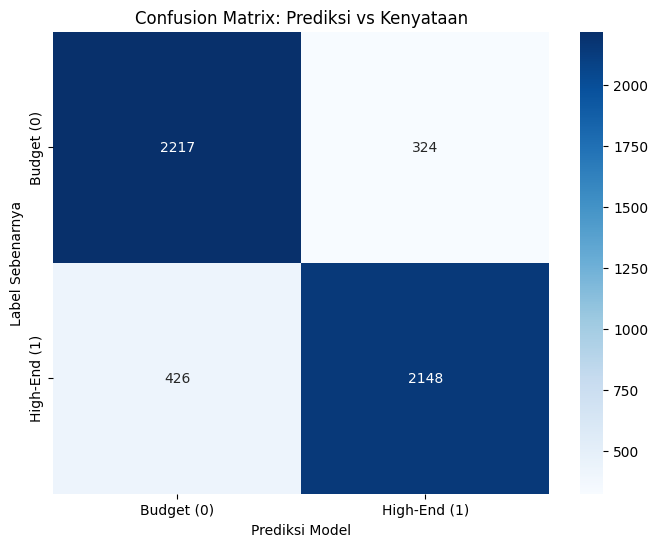

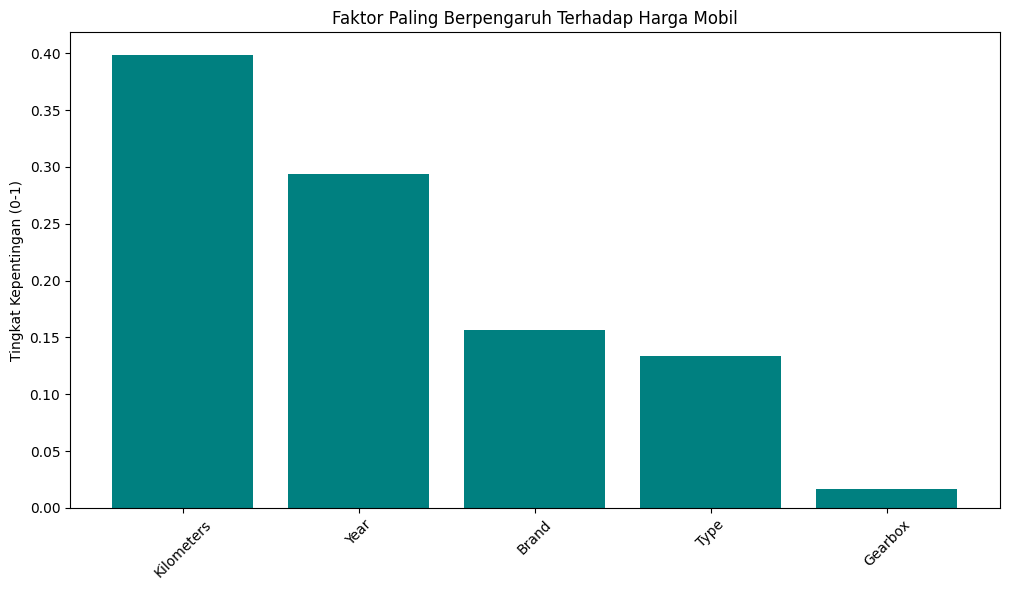

In [5]:
# ==========================================
# 6. DATA VISUALISATION
# ==========================================
import seaborn as sns
import matplotlib.pyplot as plt

print("--- Membuat Visualisasi Hasil ---")

# Visualisasi 1: Confusion Matrix Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Budget (0)', 'High-End (1)'],
            yticklabels=['Budget (0)', 'High-End (1)'])
plt.title('Confusion Matrix: Prediksi vs Kenyataan')
plt.xlabel('Prediksi Model')
plt.ylabel('Label Sebenarnya')
plt.show()

# Visualisasi 2: Feature Importance (Faktor Penentu)
# Mengambil nilai kepentingan fitur dari model Random Forest
importances = rf_model.feature_importances_
# Mengurutkan dari yang terbesar
indices = np.argsort(importances)[::-1]
feature_names = X.columns

plt.figure(figsize=(10, 6))
plt.title("Faktor Paling Berpengaruh Terhadap Harga Mobil")
plt.bar(range(X.shape[1]), importances[indices], align="center", color='teal')
plt.xticks(range(X.shape[1]), [feature_names[i] for i in indices], rotation=45)
plt.tight_layout()
plt.ylabel('Tingkat Kepentingan (0-1)')
plt.show()

### Analisis Visualisasi

1.  **Confusion Matrix Heatmap:**
    * Kotak yang berwarna paling gelap (biasanya di diagonal kiri-atas ke kanan-bawah) menunjukkan jumlah prediksi yang **BENAR**.
    * Semakin sedikit angka di kotak lain (off-diagonal), berarti semakin sedikit kesalahan yang dibuat oleh model.
    * Visualisasi ini memudahkan kita melihat apakah model lebih sering salah menebak mobil mahal menjadi murah, atau sebaliknya.

2.  **Feature Importance Plot:**
    * Grafik batang ini mengurutkan fitur berdasarkan pengaruhnya.
    * Fitur dengan batang tertinggi adalah faktor penentu utama harga.
    * Biasanya, **'Year' (Tahun)** atau **'Brand' (Merek)** akan muncul paling tinggi, yang membuktikan bahwa logika model sudah sejalan dengan logika pasar mobil di dunia nyata (mobil baru dan merek terkenal pasti lebih mahal).